In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats
import tqdm
from IPython.display import Image 

In [386]:
energy = pd.read_csv("energy.csv")
energy['Error'] = energy.apply(lambda row: (row.Total-energy['Total'][0])/energy['Total'][0], axis=1)

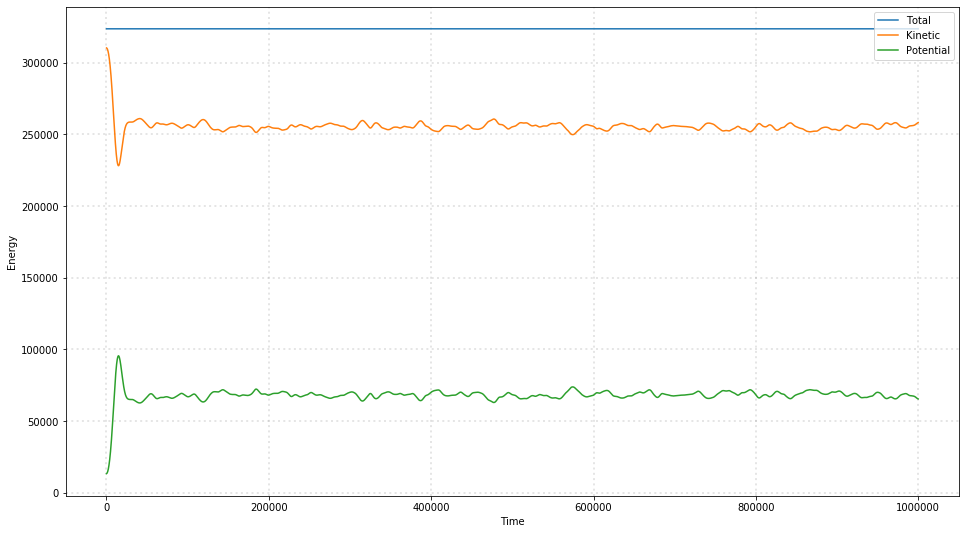

In [387]:
plt.plot(energy['t'], energy['Total'], label = 'Total')
plt.plot(energy['t'], energy['Kinetic'], label = 'Kinetic' )
plt.plot(energy['t'], energy['Potential'], label = 'Potential')
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend(loc="upper right")
plt.show()

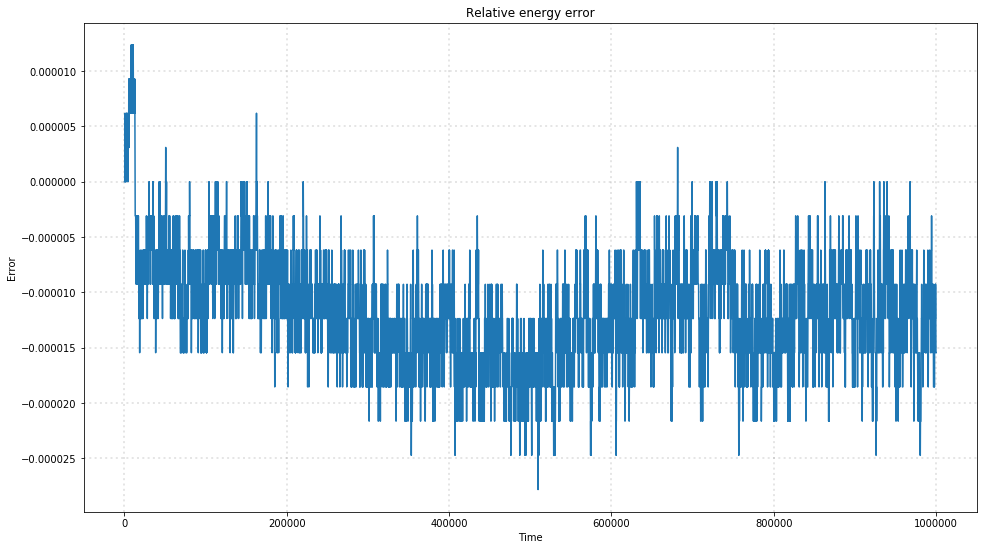

In [388]:
plt.plot(energy['t'], energy['Error'])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Relative energy error")
plt.show()

In [402]:
print("Std of total energy: " + str(energy['Total'].std()))
print("Variation of total energy: " + str(energy['Total'].std()/energy['Total'].mean()))

Std of total energy: 1.6126459301584781
Variation of total energy: 4.982558417180366e-06


In [389]:
df = pd.read_csv("liquid3.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [390]:
df['v'] = df.apply(lambda row: np.sqrt(row.vx*row.vx+row.vy*row.vy+row.vz*row.vz), axis=1)

Text(0.5, 1.0, 'v')

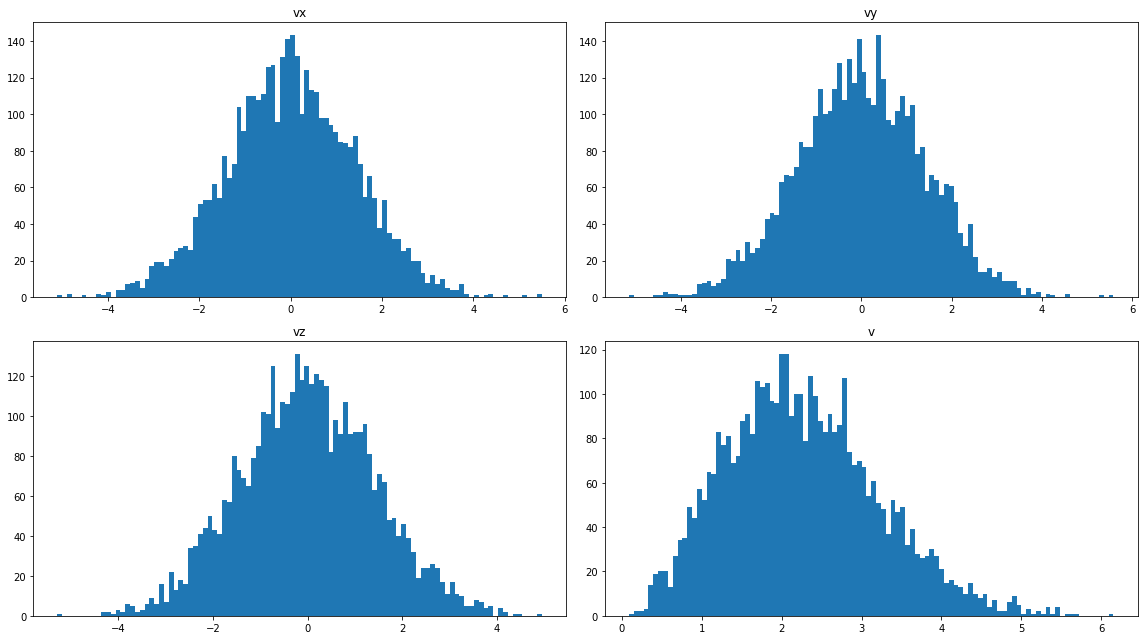

In [391]:
fig, axs = plt.subplots(2, 2, tight_layout=True)
axs[0, 0].hist(df['vx'], bins=100)
axs[0, 0].set_title("vx")
axs[0, 1].hist(df['vy'], bins=100)
axs[0, 1].set_title("vy")
axs[1, 0].hist(df['vz'], bins=100)
axs[1, 0].set_title("vz")
axs[1, 1].hist(df['v'], bins=100)
axs[1, 1].set_title("v")

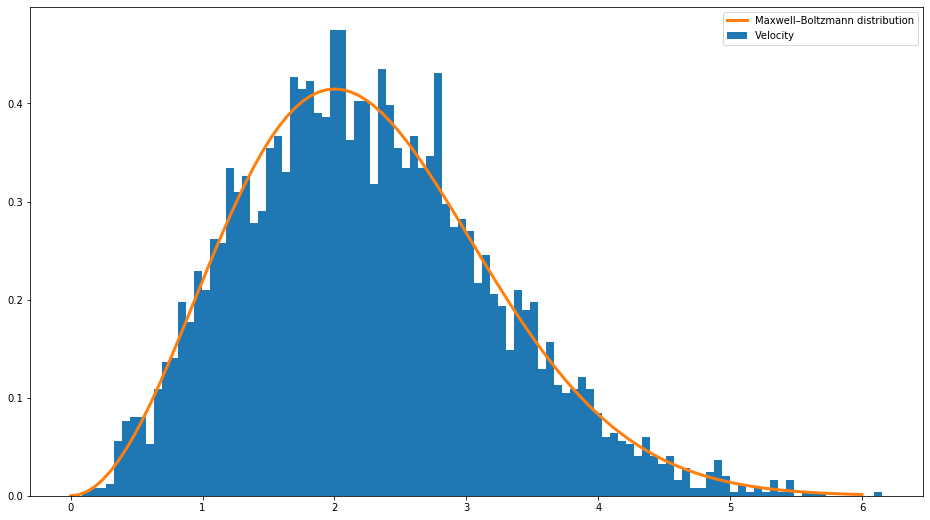

In [392]:
maxwell = stats.maxwell
data = maxwell.rvs(loc=0, scale=1, size=10000)
params = maxwell.fit(df['v'], floc=0)
plt.hist(df['v'], bins=100, density=True, label='Velocity')
x = np.linspace(0, 6, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3, label = "Maxwell–Boltzmann distribution")
plt.legend()
plt.show()

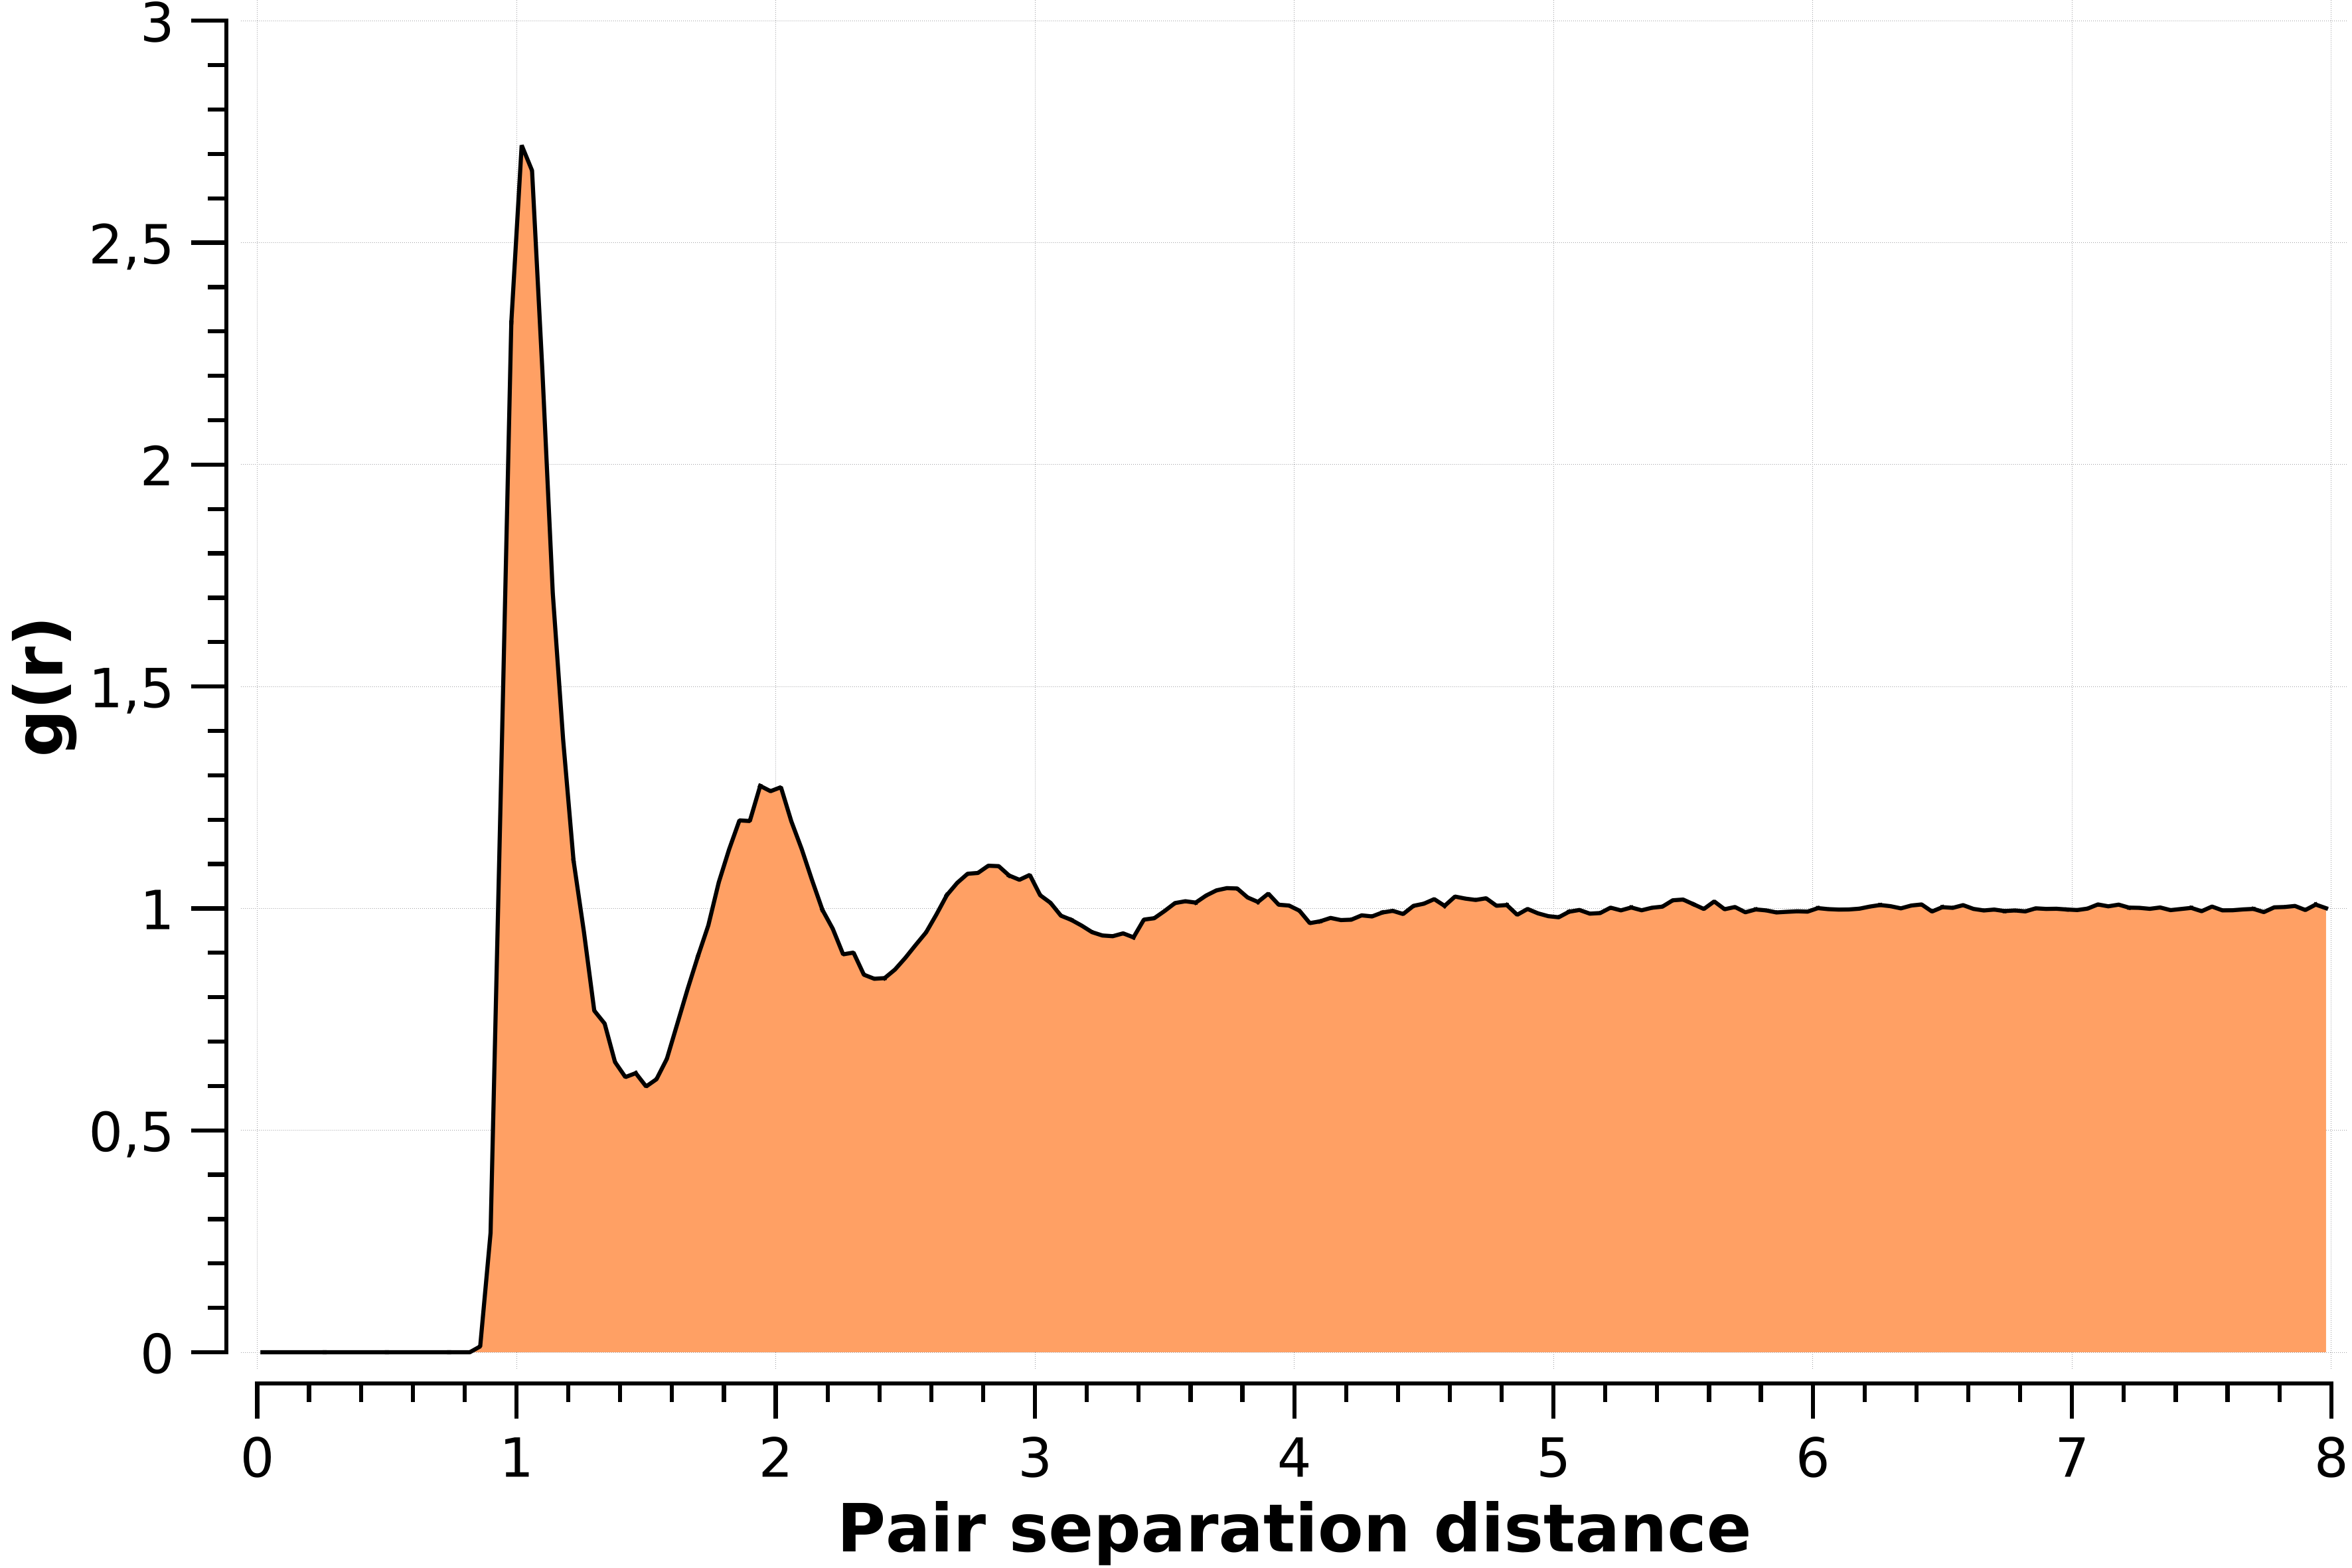

In [393]:
Image(filename="g(r)_liquid_ovito.png")
#15 bars 2 degrees 1 ro 4096 particles

In [394]:
dr = 0.04
r = np.arange(0, 8.0, dr)
g = np.zeros(len(r))
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
for n in tqdm.notebook.tnrange(4096, desc="Points"):
    x0=x[n]
    y0=y[n]
    z0=z[n]
    rx = x0 - x
    ry = y0 - y
    rz = z0 - z
    rx -= np.rint(rx/16.0)*16.0
    ry -= np.rint(ry/16.0)*16.0
    rz -= np.rint(rz/16.0)*16.0
    rt = np.sqrt(rx*rx+ry*ry+rz*rz)
    rt = np.trunc(rt/dr)
    for j in rt:
        if j<len(g) and j>1:
            rc = j*dr
            g[int(j)]+=1/(4*np.pi*rc*rc*dr)

g = g/4096

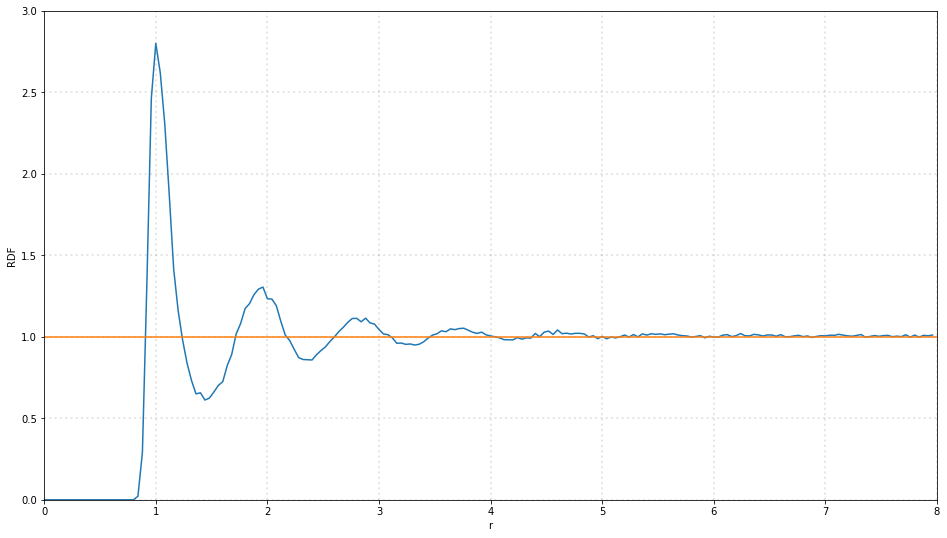

In [395]:
plt.plot(r, g)
plt.plot(np.arange(0, 9, 1), np.ones(9))
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("r")
plt.ylabel("RDF")
plt.ylim(0,3)
plt.xlim(0,8)
plt.show()